# Examen de Deep Learning
<br>

## Importation des libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import smart_resize
from tensorflow.keras import layers
from numpy import asarray
import numpy as np
from tensorflow import random
import os
import glob
import cv2
import pickle

<br/>

## Importation des images

In [2]:
# Changer le répertoire de travail
os.chdir('C:\\Users\\louis\\Documents\\Cours MSDA\\Deep Learning\\EXAMEN DEEP LEARNING')

In [3]:
# Répertoires
wd = os.getcwd()
train_path = wd+'/challenge_data'
test_path = wd+'/challenge_test_data'

In [4]:
train_count = len(list(glob.glob(train_path+'/*/*.jpg')))
print("Train images : "+str(train_count))

test_count = len(list(glob.glob(test_path+'/*/*.jpg')))
print("Test images : "+str(test_count))

Train images : 5102
Test images : 1045


In [5]:
test_paths = list(glob.glob(test_path+'/*'))
train_paths = list(glob.glob(train_path+'/*'))

In [6]:
cat = []
for i in range(len(test_paths)):
    cat.append(test_paths[i].replace(test_path+"\\",''))

<br/>

### Nom des différentes classes

In [7]:
cat

['Adhered', 'Ballasted', 'Concrete', 'Plastic _ fabric', 'Shingle', 'Steel']

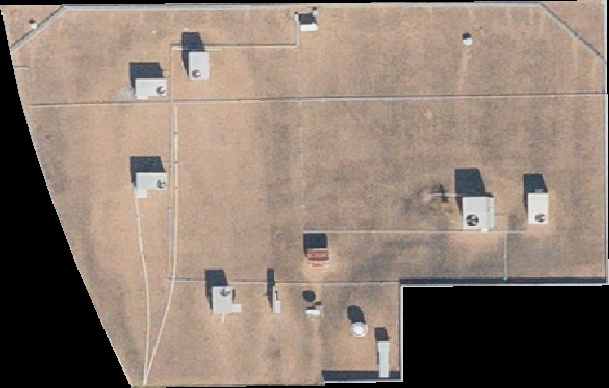

In [8]:
images = list(glob.glob(wd+'/challenge_test_data/*/*.jpg'))
IM = PIL.Image.open(str(images[0]))
IM

<br/>

## Création des datasets

In [9]:
batch_size = 64
img_height = img_width = 200

In [10]:
training_data = []
test_data = []

In [11]:
for category in train_paths:
    class_num = train_paths.index(category)
    for img in os.listdir(category):
        try:
            img_array = cv2.imread(os.path.join(category,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_height,img_width))
            training_data.append([new_array, class_num])
        except Exception as e:
            pass

In [12]:
for category in test_paths:
    class_num = test_paths.index(category)
    for img in os.listdir(category):
        try:
            img_array = cv2.imread(os.path.join(category,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_height,img_width))
            test_data.append([new_array, class_num])
        except Exception as e:
            pass

### Données d'apprentissage

In [13]:
X = [features for features, label in training_data]
Y = [label for features, label in training_data]

In [14]:
print(len(Y))
print(len(X))

5102
5102


In [15]:
X = np.array(X).reshape(-1, img_height, img_width, 1)

In [16]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

### Données de test

In [17]:
X_test = [features for features, label in test_data]
Y_test = [label for features, label in test_data]

In [18]:
X_test = np.array(X_test).reshape(-1, img_height, img_width, 1)

In [19]:
pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

### Visualisation de quelques images

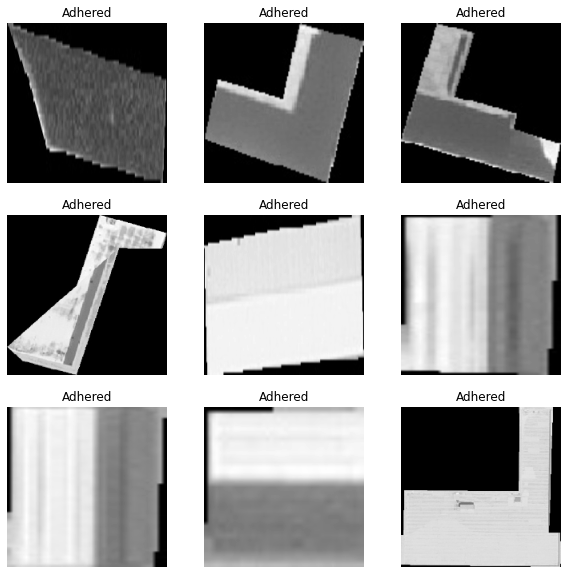

In [20]:
plt.figure(figsize=(10, 10))
i = 0
for images in training_data:
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[0], cmap="gray")
    plt.title(cat[int(Y[i])])
    plt.axis("off")
    i += 1
    if i == 9:
        break

<br/>

## Initialisation du CNN

In [21]:
x = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("Y.pickle","rb"))

X = x/255.0

In [22]:
x_test = pickle.load(open("X_test.pickle","rb"))
y_test = pickle.load(open("Y_test.pickle","rb"))

X_test = x_test/255.0

In [23]:
# Model
model = Sequential()

# Convolution
model.add(Conv2D(32, 4, input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, 3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))


#  Flattening
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(6))
model.add(Activation("softmax"))

model_output = model.predict(X[0:1])
print(model_output, Y[0:1])

[[0.17086412 0.15608063 0.18139172 0.16464762 0.15889409 0.16812176]] [0]


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 197, 197, 32)      544       
_________________________________________________________________
activation (Activation)      (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0

In [25]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [26]:
history = model.fit(X, np.array(y), batch_size=batch_size, validation_split=0.2, epochs=10)

Epoch 1/10
64/64 [==============================] - 318s 5s/step - loss: 1.6928 - accuracy: 0.2373 - val_loss: 3.3369 - val_accuracy: 0.0000e+00
Epoch 2/10
64/64 [==============================] - 300s 5s/step - loss: 1.6354 - accuracy: 0.2944 - val_loss: 3.8970 - val_accuracy: 0.0000e+00
Epoch 3/10
64/64 [==============================] - 300s 5s/step - loss: 1.6193 - accuracy: 0.3059 - val_loss: 2.9477 - val_accuracy: 0.0000e+00
Epoch 4/10
64/64 [==============================] - 294s 5s/step - loss: 1.5813 - accuracy: 0.3335 - val_loss: 3.3474 - val_accuracy: 0.0000e+00
Epoch 5/10
64/64 [==============================] - 295s 5s/step - loss: 1.5675 - accuracy: 0.3390 - val_loss: 3.6878 - val_accuracy: 0.0000e+00
Epoch 6/10
64/64 [==============================] - 291s 5s/step - loss: 1.5362 - accuracy: 0.3756 - val_loss: 3.5780 - val_accuracy: 0.0000e+00
Epoch 7/10
64/64 [==============================] - 5879s 93s/step - loss: 1.5589 - accuracy: 0.3640 - val_loss: 3.1317 - val_accu

In [27]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]
val_loss_curve = history.history["val_loss"]
val_acc_curve = history.history["val_accuracy"]

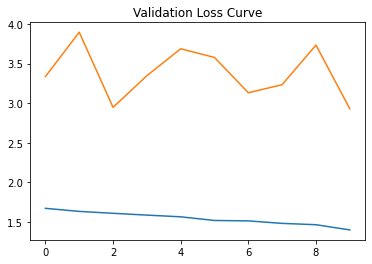

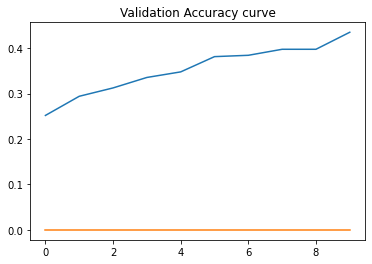

In [28]:
plt.plot(loss_curve)
plt.title("Loss Curve")
plt.plot(val_loss_curve)
plt.title("Validation Loss Curve")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy Curve")
plt.plot(val_acc_curve)
plt.title("Validation Accuracy curve")
plt.show()

In [29]:
history0 = model.predict(X_test)
history0

array([[0.26668465, 0.08889628, 0.48965934, 0.08737058, 0.0151438 ,
        0.05224536],
       [0.23920819, 0.10894198, 0.11446308, 0.31937656, 0.17455314,
        0.04345706],
       [0.18676668, 0.21557966, 0.0691966 , 0.09457451, 0.4105884 ,
        0.02329406],
       ...,
       [0.22060588, 0.11583713, 0.26465562, 0.07774324, 0.29505628,
        0.02610194],
       [0.3289944 , 0.03156699, 0.36282337, 0.118803  , 0.01168513,
        0.14612718],
       [0.35868376, 0.03382007, 0.25571042, 0.26854816, 0.0134185 ,
        0.06981907]], dtype=float32)

<br/>

## Initialisation du MLP

In [30]:
X.shape

(5102, 200, 200, 1)

In [31]:
# Création du MLP
model2 = Sequential()
model2.add(Flatten(input_shape=X.shape[1:]))

In [32]:
# Création des couches
model2.add(Dense(256, activation="relu"))
model2.add(Dense(128, activation="relu"))
model2.add(Dense(6, activation="softmax"))

model2_output = model2.predict(X[0:1])
print(model2_output, Y[0:1])

[[0.22714873 0.15793455 0.11410256 0.20380501 0.15033747 0.14667168]] [0]


In [33]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               10240256  
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
Total params: 10,273,926
Trainable params: 10,273,926
Non-trainable params: 0
_________________________________________________________________


In [34]:
model2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [35]:
history2 = model2.fit(X, np.array(y), batch_size=32, validation_split=0.2, epochs=10)

Epoch 1/10
128/128 [==============================] - 17s 116ms/step - loss: 1.8337 - accuracy: 0.2644 - val_loss: 3.5706 - val_accuracy: 0.0000e+00
Epoch 2/10
128/128 [==============================] - 11s 83ms/step - loss: 1.6407 - accuracy: 0.2927 - val_loss: 3.4521 - val_accuracy: 0.0000e+00
Epoch 3/10
128/128 [==============================] - 10s 80ms/step - loss: 1.6171 - accuracy: 0.3056 - val_loss: 3.5759 - val_accuracy: 0.0000e+00
Epoch 4/10
128/128 [==============================] - 10s 81ms/step - loss: 1.5695 - accuracy: 0.3496 - val_loss: 3.8860 - val_accuracy: 0.0000e+00
Epoch 5/10
128/128 [==============================] - 10s 80ms/step - loss: 1.5670 - accuracy: 0.3382 - val_loss: 3.3412 - val_accuracy: 0.0000e+00
Epoch 6/10
128/128 [==============================] - 10s 79ms/step - loss: 1.5315 - accuracy: 0.3808 - val_loss: 4.2042 - val_accuracy: 0.0000e+00
Epoch 7/10
128/128 [==============================] - 10s 80ms/step - loss: 1.5098 - accuracy: 0.3988 - val_los

In [36]:
loss_curve2 = history2.history["loss"]
acc_curve2 = history2.history["accuracy"]
val_loss_curve2 = history2.history["val_loss"]
val_acc_curve2 = history2.history["val_accuracy"]

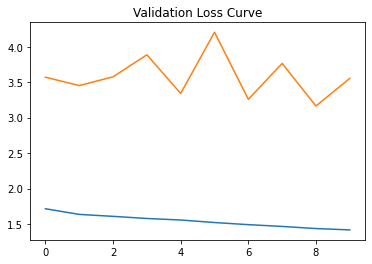

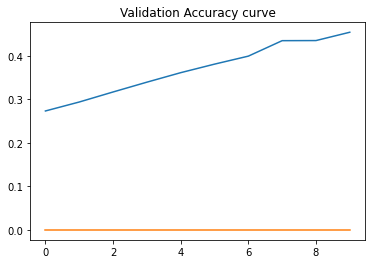

In [37]:
plt.plot(loss_curve2)
plt.title("Loss Curve")
plt.plot(val_loss_curve2)
plt.title("Validation Loss Curve")
plt.show()

plt.plot(acc_curve2)
plt.title("Accuracy Curve")
plt.plot(val_acc_curve2)
plt.title("Validation Accuracy curve")
plt.show()

In [38]:
history3 = model2.predict(X_test)

In [39]:
history3

array([[0.4662778 , 0.08449104, 0.21914113, 0.02009795, 0.1766652 ,
        0.03332688],
       [0.35344645, 0.04214719, 0.1115346 , 0.06087775, 0.40184426,
        0.03014976],
       [0.42141998, 0.03716511, 0.05361956, 0.03701486, 0.4004578 ,
        0.0503228 ],
       ...,
       [0.1078851 , 0.04394459, 0.05123484, 0.04310149, 0.7343347 ,
        0.01949929],
       [0.32000074, 0.03490097, 0.08252656, 0.01457471, 0.534244  ,
        0.01375297],
       [0.4084897 , 0.0295685 , 0.11202369, 0.04815103, 0.3827995 ,
        0.01896762]], dtype=float32)